In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()

data = open(r'C:\Users\arjun\Downloads\text_generation\text_generation\ab.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


In [4]:
tokenizer.word_index

{'and': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'my': 5,
 'i': 6,
 'in': 7,
 'that': 8,
 'thy': 9,
 'thou': 10,
 'with': 11,
 'for': 12,
 'is': 13,
 'love': 14,
 'not': 15,
 'but': 16,
 'a': 17,
 'me': 18,
 'thee': 19,
 'so': 20,
 'be': 21,
 'as': 22,
 'all': 23,
 'you': 24,
 'his': 25,
 'which': 26,
 'when': 27,
 'it': 28,
 'this': 29,
 'by': 30,
 'your': 31,
 'doth': 32,
 'do': 33,
 'from': 34,
 'on': 35,
 'or': 36,
 'no': 37,
 'then': 38,
 'have': 39,
 'what': 40,
 'are': 41,
 'if': 42,
 'more': 43,
 'mine': 44,
 'their': 45,
 'shall': 46,
 'sweet': 47,
 'time': 48,
 'will': 49,
 'they': 50,
 'beauty': 51,
 'nor': 52,
 'eyes': 53,
 'art': 54,
 'her': 55,
 'heart': 56,
 'yet': 57,
 'o': 58,
 'than': 59,
 'can': 60,
 'should': 61,
 'thine': 62,
 'now': 63,
 'where': 64,
 'make': 65,
 'one': 66,
 'hath': 67,
 'he': 68,
 'fair': 69,
 'still': 70,
 'how': 71,
 'eye': 72,
 'him': 73,
 'like': 74,
 'true': 75,
 'see': 76,
 'am': 77,
 'she': 78,
 'those': 79,
 'though': 80,
 'being': 81,
 'some'

In [5]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [7]:
corpus[254]

'so long lives this and this gives life to thee.'

In [9]:
tokenizer.word_index["long"]

210

In [10]:
input_sequences

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278],
 [16, 10],
 [16, 10, 880],
 [16, 10, 880, 3],
 [16, 10, 880, 3, 62],
 [16, 10, 880, 3, 62, 85],
 [16, 10, 880, 3, 62, 85, 214],
 [16, 10, 880, 3, 62, 85, 214, 53],
 [1372, 9],
 [1372, 9, 1373],
 [1372, 9, 1373, 636],
 [1372, 9, 1373, 636, 11],
 [1372, 9, 1373, 636, 11, 122],
 [1372, 9, 1373, 636, 11, 122, 1374],
 [1372, 9, 1373, 636, 11, 122, 1374, 1375],
 [201, 17],
 [201, 17, 1376],
 [201, 17, 1376, 64],
 [201, 17, 1376, 64, 518],
 [201,

In [11]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))



In [14]:
input_sequences.shape

(15462, 11)

In [15]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [26]:
predictors

array([[   0,    0,    0, ...,    0,    0,   34],
       [   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       ...,
       [   0,    0,    0, ..., 3209,  493,  493],
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15]])

In [25]:
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
label.shape

(15462, 3211)

In [27]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) 
model.add(Bidirectional(LSTM(150, return_sequences=True))) 
model.add(Dropout(0.2)) 
model.add(LSTM(100))  
model.add(Dense(total_words/2, activation='relu'))  
model.add(Dense(total_words, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [30]:
 history = model.fit(predictors, label, epochs=243, verbose=1)

Epoch 1/243
484/484 [==============================] - 56s 116ms/step - loss: 6.8011 - accuracy: 0.0229
Epoch 2/243
484/484 [==============================] - 51s 106ms/step - loss: 6.4281 - accuracy: 0.0336
Epoch 3/243
484/484 [==============================] - 37s 77ms/step - loss: 6.2182 - accuracy: 0.0365
Epoch 4/243
484/484 [==============================] - 43s 90ms/step - loss: 5.9837 - accuracy: 0.0438
Epoch 5/243
484/484 [==============================] - 43s 89ms/step - loss: 5.7008 - accuracy: 0.0563
Epoch 6/243
484/484 [==============================] - 40s 82ms/step - loss: 5.4080 - accuracy: 0.0700
Epoch 7/243
484/484 [==============================] - 40s 82ms/step - loss: 5.1187 - accuracy: 0.0859
Epoch 8/243
484/484 [==============================] - 37s 76ms/step - loss: 4.8163 - accuracy: 0.1024
Epoch 9/243
484/484 [==============================] - 33s 68ms/step - loss: 4.5009 - accuracy: 0.1193
Epoch 10/243
484/484 [==============================] - 35s 72ms/step -

In [31]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("arjun.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

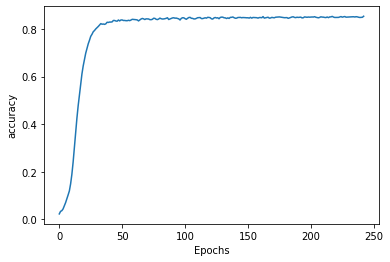

In [34]:
import matplotlib.pyplot as plt
plot_graph(history,'accuracy')

In [44]:
seed_text = "what"
next_words = 8
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    print(seed_text)

what merit
what merit lived
what merit lived in
what merit lived in me
what merit lived in me that
what merit lived in me that you
what merit lived in me that you should
what merit lived in me that you should love
